# Defining time segments, getting statistics, and plotting PSD

First we import the package

In [1]:
import os;
import sys;


# Adjust this to the relative path from your notebook to the source directory
sys.path.insert(0, os.path.abspath('../../../src'));

In [2]:
import aerosoltools as at

Then we load the SMPS data

In [3]:
filename = r"..\..\..\tests\data\Sample_SMPS.txt";
SMPS_data = at.Load_SMPS_file(filename);

Data is already in number concentration (cm⁻³).


We then visualiza the dataset via timeseries plot

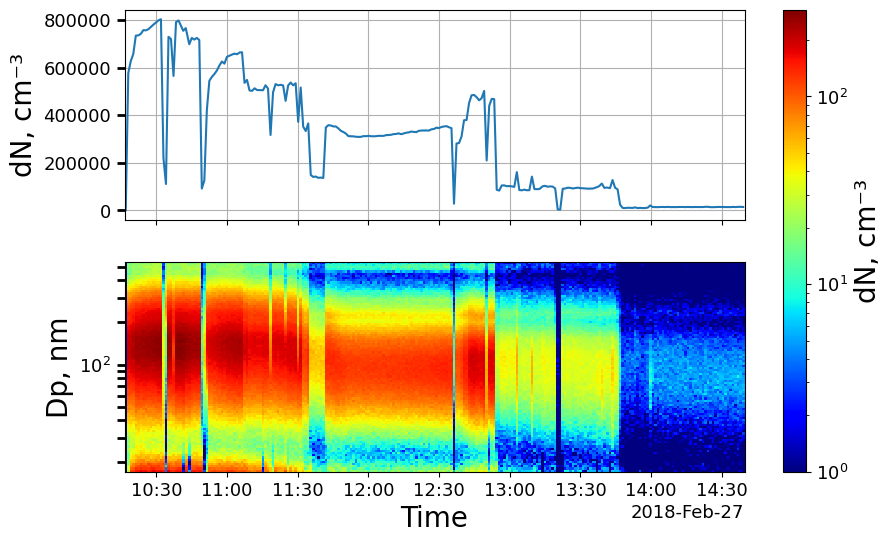

In [4]:
SMPS_data.plot_timeseries(y_3d=(1,0));

We see that there are specific time intervals where the particle number concentration rises. Now we want to pool the data points within some of these times, and categorize them as specific activities e.g. cutting, sanding, or just emission.

In order to do so, we first need to make a dictionary with start and end times of the relevant time periods:

In [5]:
activity_periods = {
    "Emission": [
        ("2018-02-27 10:18:00", "2018-02-27 10:31:00"),
        ("2018-02-27 10:35:00", "2018-02-27 10:48:00"),
        ("2018-02-27 10:52:00", "2018-02-27 11:30:00"),
        ("2018-02-27 12:39:00", "2018-02-27 12:48:00")
    ],
    "Constant phase 1": [
        ("2018-02-27 11:43:00", "2018-02-27 12:35:00")
    ],
    "Constant phase 2": [
        ("2018-02-27 12:55:00", "2018-02-27 13:45:00")
    ],
    "Background": [
        ("2018-02-27 13:48:00", "2018-02-27 14:39:00")
   ]
}

We then mark this activities within the dataset, making a boolean column in the main DataFrame used for indexing the defined activity periods.

In [6]:
SMPS_data.mark_activities(activity_periods)

We can then replot the time_series but now while marking activities:

Hello


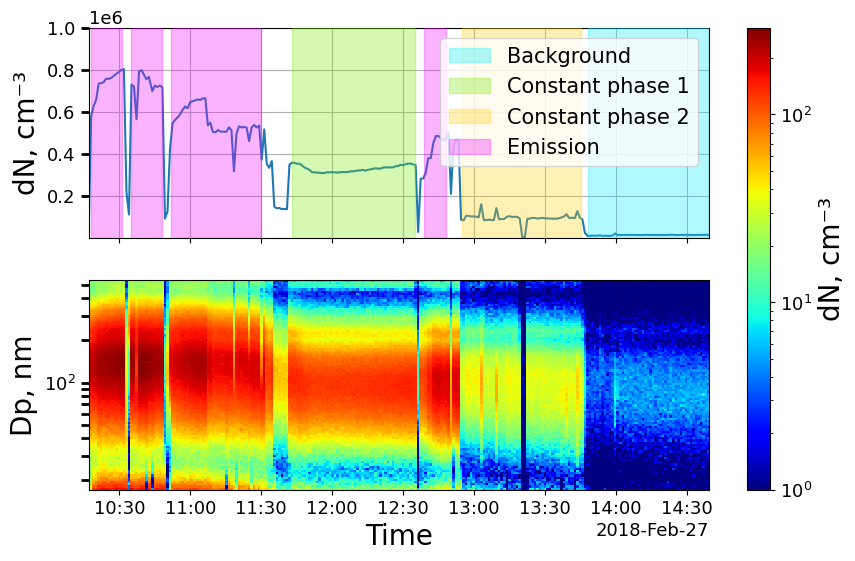

In [10]:
SMPS_data.plot_timeseries(y_3d=(1,0),y_tot = (0,1e6), mark_activities=True);

Finally we can use the summarize function to get statistics of the PNC, PMx levels, total mass, and particle sizes during each time segment.

In [14]:
SMPS_data.summarize();

Data is already in number concentration (cm⁻³).

Summary of aerosol properties (transposed):

+------------------------+----------+----------+------------------+------------------+------------+
|                        | All data | Emission | Constant phase 1 | Constant phase 2 | Background |
+------------------------+----------+----------+------------------+------------------+------------+
|       PNC (cm⁻³)       | 4505.07  | 9414.08  |     5124.14      |     1460.11      |   201.58   |
|     PNC std (cm⁻³)     |  3804.2  | 1936.08  |      242.51      |      375.53      |   29.92    |
|      PM1 (µg/m³)       |  13.54   |  33.45   |      10.68       |       3.04       |    0.43    |
|    PM1 std (µg/m³)     |  14.57   |   10.5   |       0.69       |       0.8        |    0.06    |
|     PM2.5 (µg/m³)      |  13.54   |  33.45   |      10.68       |       3.04       |    0.43    |
|   PM2.5 std (µg/m³)    |  14.57   |   10.5   |       0.69       |       0.8        |    0.06    |
|     

We can also plot the PSD of each time segment:

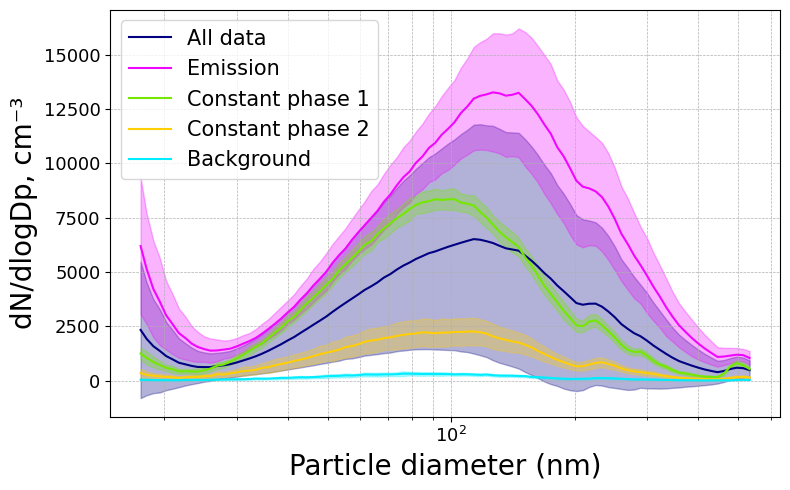

In [18]:
fig,ax = SMPS_data.plot_psd();